Analyse des ventes de jeux vidéos par rapport a leur note MetaCritic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ventes = pd.read_csv("csv/Video_Games_Sales.csv",sep=',',encoding="ISO-8859-1")

In [3]:
ventes

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ventes.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
ventes.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Clean des na par rapport aux notes

In [6]:
ventes = ventes[ventes['Critic_Score'].notna()]
ventes = ventes[ventes['User_Score'].notna()]
ventes = ventes[ventes['User_Count'].notna()]

In [7]:
ventes.isnull().sum()

Name                 0
Platform             0
Year_of_Release    123
Genre                0
Publisher            4
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            4
Rating              70
dtype: int64

In [8]:
ventes.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [9]:
ventes.User_Score=ventes.User_Score.astype('float')
ventes.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [10]:
ventes.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6894.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,2007.482303,0.389290,0.233095,0.062951,0.081525,0.767049,70.249822,28.783241,7.182428,173.432664
std,4.236401,0.957051,0.679210,0.284162,0.266594,1.940317,13.880646,19.167119,1.441241,581.977516
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [17]:
ventes_pays = pd.DataFrame()
ventes_pays['NA_Sales'] = ventes.NA_Sales
ventes_pays['EU_Sales'] = ventes.EU_Sales
ventes_pays['JP_Sales'] = ventes.JP_Sales
ventes_pays['Other_Sales'] = ventes.Other_Sales
# ventes_pays['Global_Sales'] = ventes.Global_Sales
ventes_pays

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
6,11.28,9.14,6.50,2.88
7,13.96,9.18,2.93,2.84
8,14.44,6.94,4.70,2.24
11,9.71,7.47,4.13,1.90
13,8.92,8.03,3.60,2.15
14,15.00,4.89,0.24,1.69
15,9.01,8.49,2.53,1.77


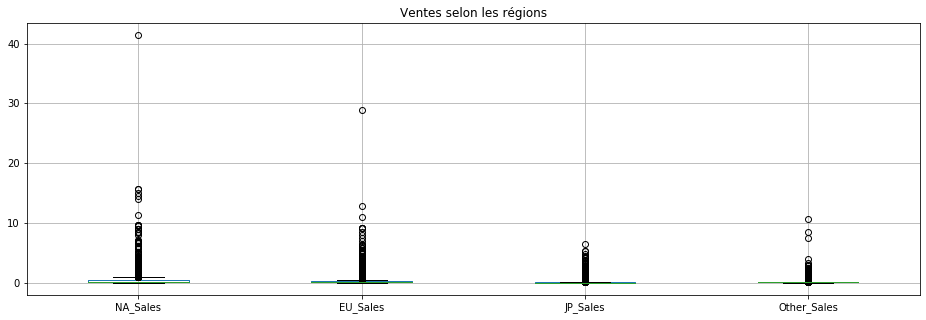

In [27]:
plt.figure(figsize=(16,5))
ventes_pays.boxplot()
plt.title("Ventes selon les régions")
plt.show()

Les utilisateurs notent sur 10 et non 100, donc les valeurs doivent être multiplié par 10

In [28]:
critiques = pd.DataFrame()
critiques['Critic_Score'] = ventes.Critic_Score
critiques['User_Score'] = ventes.User_Score*10
critiques

,Critic_Score,User_Score
0,76.0,80.0
2,82.0,83.0
3,80.0,80.0
6,89.0,85.0
7,58.0,66.0
8,87.0,84.0
11,91.0,86.0
13,80.0,77.0
14,61.0,63.0
15,80.0,74.0


On peut voir sur le graph que les utilisateurs en moyennes donnent la même 

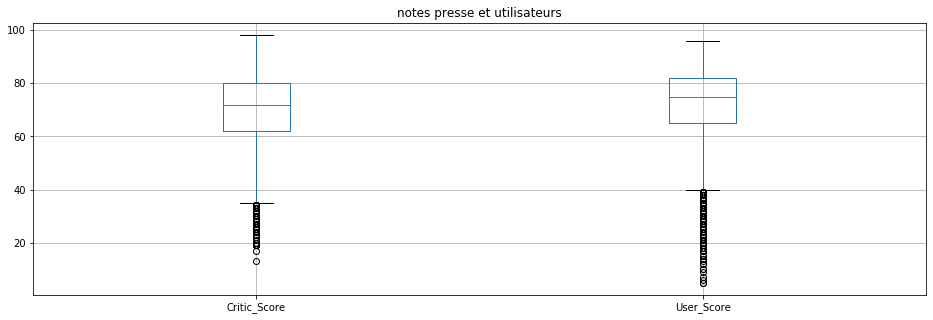

In [29]:
plt.figure(figsize=(16,5))
critiques.boxplot()
plt.title("notes presse et utilisateurs")
plt.show()

In [51]:
ventesX = ventes[['Critic_Score','Critic_Count','User_Score','User_Count']]
ventesY = ventes[['Global_Sales']]

In [52]:
ventesX.head()

,Critic_Score,Critic_Count,User_Score,User_Count
0,76.0,51.0,8.0,322.0
2,82.0,73.0,8.3,709.0
3,80.0,73.0,8.0,192.0
6,89.0,65.0,8.5,431.0
7,58.0,41.0,6.6,129.0


In [53]:
ventesY.head()

,Global_Sales
0,82.53
2,35.52
3,32.77
6,29.80
7,28.92


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
ventesX_train, ventesX_test, ventesY_train, ventesY_test = train_test_split(ventesX,ventesY,test_size=0.2)
len(ventesX_train)

5613

In [56]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [57]:
clf.fit(ventesX_train,ventesY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)